<a href="https://colab.research.google.com/github/arpit1532000/SUPERSTORE-SALES-DASHBOARD/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data overview

In [ ]:
car_df = pd.read_csv('/content/car data.csv')

In [ ]:
car_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [ ]:
car_df.isnull().sum()

,0
Car_Name,0
Year,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0
Selling_Price,0


<Axes: >

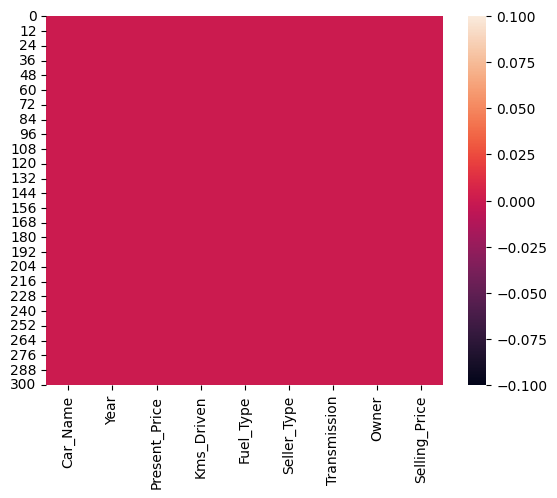

In [ ]:
sns.heatmap(car_df.isnull())

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_df.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.247915,5.082812
min,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,15000.000000,0.000000,0.900000
50%,2014.000000,6.400000,32000.000000,0.000000,3.600000
75%,2016.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


In [ ]:
car_df.shape

(301, 9)

In [ ]:
car_df.nunique()

,0
Car_Name,98
Year,16
Present_Price,147
Kms_Driven,206
Fuel_Type,3
Seller_Type,2
Transmission,2
Owner,3
Selling_Price,156


In [ ]:
car_df.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [ ]:
car_df.dtypes

,0
Car_Name,object
Year,int64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64
Selling_Price,float64


# ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
car_name_le = LabelEncoder()
car_df['Car_Name'] =car_name_le.fit_transform(car_df['Car_Name'])

In [ ]:
Fuel_Type_le = LabelEncoder()
car_df['Fuel_Type'] =Fuel_Type_le.fit_transform(car_df['Fuel_Type'])

In [ ]:
Seller_Type_le = LabelEncoder()
car_df['Seller_Type'] =Seller_Type_le.fit_transform(car_df['Seller_Type'])

In [ ]:
Transmission_le = LabelEncoder()
car_df['Transmission'] =Transmission_le.fit_transform(car_df['Transmission'])

In [ ]:
car_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25
3,96,2011,4.15,5200,2,0,1,0,2.85
4,92,2014,6.87,42450,1,0,1,0,4.60


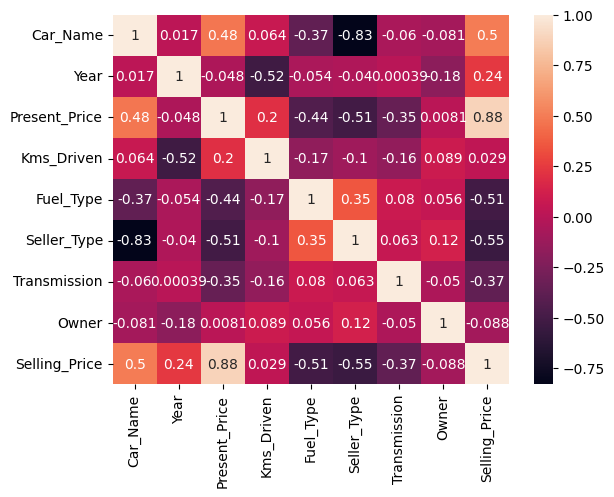

In [ ]:
sns.heatmap(car_df.corr(), annot = True)
plt.show()

# X,Y input and output separation  


In [ ]:
x= car_df.iloc[:,:-1]
y= car_df['Selling_Price']

In [ ]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


# INPUT Data scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_scaler = StandardScaler()

In [ ]:
x = pd.DataFrame(x_scaler.fit_transform(x), columns = x.columns)

In [ ]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.221505,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.257427,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.403079,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.087890,0.141743,-1.852241,-0.737285,0.39148,-0.174501
...,...,...,...,...,...,...,...,...
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.39148,-0.174501
297,0.134290,0.475308,-0.200292,0.593804,0.500183,-0.737285,0.39148,-0.174501
298,0.251795,-1.603156,0.390687,1.313340,0.500183,-0.737285,0.39148,-0.174501
299,0.251795,1.168129,0.564504,-0.719876,-1.852241,-0.737285,0.39148,-0.174501


# Train and Test splittinng

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Importing algorithms

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
lr =  LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(88.40630578239453, 84.65539666857805)

In [ ]:
lr1 = Lasso(alpha=0.05)
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)*100, lr1.score(x_test,y_test)*100

(88.35433202380113, 84.42023265451037)

In [ ]:
lr2 = Ridge(alpha=5)
lr2.fit(x_train,y_train)
lr2.score(x_train,y_train)*100, lr2.score(x_test,y_test)*100

(88.37406606333195, 84.42238212828163)

In [ ]:
lr3 = ElasticNet(alpha=0.05)
lr3.fit(x_train,y_train)
lr3.score(x_train,y_train)*100, lr3.score(x_test,y_test)*100

(88.33239931760652, 84.24688675401035)

Decision tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 94.68504414783759)

In [ ]:
mean_squared_error(y_test, dt.predict(x_test)), mean_absolute_error(y_test, dt.predict(x_test))

(1.2243311475409837, 0.6845901639344261)

Random forest regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100

(98.42485653760205, 96.37655359851863)

In [ ]:
mean_squared_error(y_test, rf.predict(x_test)), mean_absolute_error(y_test, rf.predict(x_test))

(0.8346820583606555, 0.5920885245901635)

# Prediction

In [ ]:
rf.predict([[1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.8635])

In [ ]:
new_data = pd.DataFrame([['ritz', 2014, 5.59, 27000, 'Petrol', 'Dealer', 'Manual', 0]], columns=x_train.columns)

In [ ]:
new_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0


In [ ]:
new_data['Car_Name'] = car_name_le.transform(new_data['Car_Name'])

In [ ]:
new_data['Fuel_Type'] = Fuel_Type_le.transform(new_data['Fuel_Type'])

In [ ]:
new_data['Seller_Type'] = Seller_Type_le.transform(new_data['Seller_Type'])

In [ ]:
new_data['Transmission'] = Transmission_le.transform(new_data['Transmission'])

In [ ]:
new_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0


In [ ]:
new_data = pd.DataFrame(x_scaler.transform(new_data), columns = new_data.columns)

In [ ]:
new_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501


In [ ]:
rf.predict(new_data)

array([3.8635])